<a href="https://colab.research.google.com/github/LennartKeller/TextklassifikationsProjekt2019/blob/master/CNN_HistWords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip uninstall --yes tensorflow
! pip install tensorflow==2.1.0

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0
     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 450kB 56.9MB/s 
     |████████████████████████████████| 3.8MB 61.4MB/s 
     |████████████████████████████████| 81kB 12.4MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [1]:
pip install fasttext

In [2]:
import matplotlib.pyplot as plt

def plot_results(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "ro", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    plt.clf() #clears the figure

    acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    plt.plot(epochs, acc, "b", label="Training acc")
    plt.plot(epochs, val_acc, "ro", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Acc")
    plt.legend()

    plt.show()

from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt

def plot_results_f1(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "ro", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    plt.clf() #clears the figure

    acc = history.history["f1_m"]
    val_acc = history.history["val_f1_m"]

    plt.plot(epochs, acc, "b", label="Training f1_m")
    plt.plot(epochs, val_acc, "ro", label="Validation f1_m")
    plt.title("Training and validation f1_m")
    plt.xlabel("Epochs")
    plt.ylabel("Acc")
    plt.legend()

    plt.show()

In [4]:
from google.colab import drive
import os
import numpy as np

drive.mount('/content/gdrive/')
!ls
os.chdir('gdrive/My Drive')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/
gdrive	sample_data
 1800-vocab.pkl  'Colab Notebooks'	   model1.h5
 1800-w.npy	  fastText		   model2.h5
 cc.de.300.bin	  full_taggeddataset.csv   model.png


In [0]:
import pandas as pd
from sklearn.utils import shuffle
df = pd.read_csv('full_taggeddataset.csv')
df = df[df.genre != 'NEWS']
df = shuffle(df, random_state=42)

In [115]:
df.head()

,Unnamed: 0,Unnamed: 0.1,tokens,pos_tags,lemmas,title,genre,period,region,year,corpus
941,943,607,Zwischen den Serosablättern findet sich normal...,APPR ART NN VVFIN PRF ADV ADV ART ADJA NN $( N...,zwischen die Serosablättern finden sich normal...,Stauung,SCIE,P6,WMD,1902,innsbruck
758,758,422,Einleitung § 1 . Verbreitung der Pflanzen über...,NN NN CARD $. NN ART NN APPR ART NN ART NN $. ...,Einleitung § @card@ . Verbreitung die Pflanze|...,Geschichte,SCIE,P5,OOD,1852,innsbruck
135,135,135,Das zwey vnd dreysigste Capitel . Des Præsiden...,ART CARD KON ADJA NN SENT ART NN APPR NE NN AP...,die zwei und dreysigste Kapitel . die Präsiden...,Morgenlaendisch.txt,NARR,P1,NOD,1658,manchester
655,655,319,Ein lang gezogener kräftiger Ruf hallte durch ...,ART ADJD ADJA ADJA NN VVFIN APPR ART ADJA NN $...,eine lang gezogen kräftig Ruf hallen durch die...,Sanct,NARR,P5,OOD,1868,innsbruck
90,90,90,Titulus quintus . DE STUPRO . Von Jungfrawen o...,NE NE SENT NE NE SENT APPR NN KON NN SENT CARD...,Titulus Quintus . de STUPRO . von Jungfrawen o...,Luebeck.txt,LEGA,P1,NOD,1657,manchester


In [0]:
df_train = df[df.period == 'P1']
df_test = df[df.period != 'P1']

period_dfs = [df[df.period == p] for p in sorted(df.period.unique())]

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_WORDS = 20000
MAX_LEN = 2000

tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(df_train.lemmas)

train_seq = tokenizer.texts_to_sequences(df_train.lemmas)
test_seq = tokenizer.texts_to_sequences(df_test.lemmas)

train_seq = pad_sequences(train_seq, maxlen=MAX_LEN)
test_seq = pad_sequences(test_seq, maxlen=MAX_LEN)

In [95]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(df_train.genre)
y_test = le.transform(df_test.genre)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

le.classes_

array(['DRAM', 'HUMA', 'LEGA', 'NARR', 'SCIE', 'SERM'], dtype=object)

# 1. Modell



In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.losses import CosineSimilarity
from tensorflow.keras.optimizers import SGD


def build_cnn_model(N_CLASSES,
                    MAX_LEN,
                    NUM_WORDS,
                    EMB_DIM=20,
                    filter_sizes=[5,3,2],
                    num_filters=32):

  inp = Input(shape=(MAX_LEN,))

  emb = Embedding(input_dim=NUM_WORDS, output_dim=EMB_DIM, input_length=MAX_LEN)(inp)

  convolutions = []
  for fs in filter_sizes:

    conv = Conv1D(filters=32, kernel_size=fs, padding='valid', activity_regularizer='l2')(emb)
    conv_dropout = SpatialDropout1D(0.8)(conv)
    pooling = MaxPool1D(strides=30, padding='valid')(conv_dropout)
    convolutions.append(pooling)
  
  if len(convolutions) > 1:
    concat = Concatenate()(convolutions)
    global_pooling = GlobalMaxPool1D()(concat)
    flatten = Flatten()(global_pooling)
  else:
    global_pooling = GlobalMaxPool1D()(pooling)
    flatten = Flatten()(global_pooling)
  dropout = Dropout(0.5)(flatten)
  output = Dense(N_CLASSES, activation='softmax')(dropout)

  model = Model(inputs=inp, outputs=output)
  
  cosine_loss = CosineSimilarity(axis=0)

  #sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
  model.compile(loss=cosine_loss, optimizer='rmsprop', metrics=['acc', f1_m])

  model.summary()

  return model

In [0]:
nn_model = build_cnn_model(N_CLASSES=np.unique(len(le.classes_)),
                        MAX_LEN=MAX_LEN,
                        NUM_WORDS=NUM_WORDS,
                        filter_sizes=list(range(1,3)))

In [0]:
history = nn_model.fit(train_seq,
                    y_train,
                    batch_size=64,
                    #validation_split=.1,
                    validation_data=(test_seq,y_test),
                    epochs=1000)

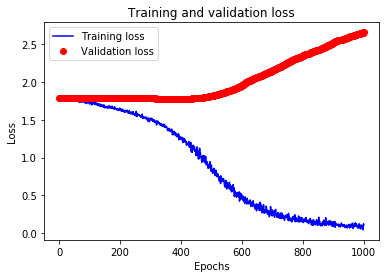

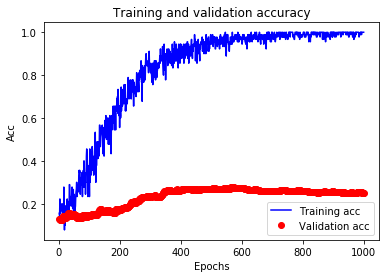

In [25]:
plot_results(history)

In [0]:
!ls

 1800-vocab.pkl   1800-w.npy  'Colab Notebooks'   full_taggeddataset.csv


# 2. Model: Using Pretrained FastText Embeddings

In [15]:
from fasttext.FastText import load_model
model = load_model('cc.de.300.bin')

In [0]:
vocab = set(model.get_words())

In [17]:
from scipy.spatial.distance import cosine

cosine(model.get_word_vector('Stuhl'), model.get_word_vector('Bundeskanzler'))

0.7707312256097794

In [0]:
from tqdm import tqdm_notebook
from typing import List

def filter_token(texts: List[str], vocab: set):
  results = []
  for entry in tqdm_notebook(texts):
    result = []
    for token in entry.split():
      if token in vocab:
        result.append(token)
    results.append(" ".join(result))
  return results

In [0]:
df_train_filtered = df_train.copy()
df_test_filtered = df_test.copy()

#df_train_filtered.lemmas = filter_token(df_train_filtered.lemmas, set(vocab))
#df_test_filtered.lemmas = filter_token(df_test_filtered.lemmas, set(vocab))

In [120]:
df_train_filtered.lemmas

135    die zwei und dreysigste Kapitel . die Präsiden...
90     Titulus Quintus . de STUPRO . von Jungfrawen o...
301    Lehr-Puncten . ein absonderliche Haupt-Lehre s...
54     LXXIIX . Huren-Liebe sein nicht beständig . Er...
10     wir haben unser Volk nun sehen wieder kommen /...
                             ...                        
255    wie man die Zucker / Frucht / Wurzel / Schale ...
58     die fünft Betrachtung / wie leicht die Kleinod...
257    die . Kapitel . von die Purgier-Mitteln / und ...
99     SECUNDA PARS . von Ritter-Rath und die Verfass...
102    Titel V . wie die Stadt : Amt : und Gerichtssc...
Name: lemmas, Length: 90, dtype: object

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

NUM_WORDS = 15000
MAX_LEN = 500

tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(df_test_filtered.lemmas)

train_seq = tokenizer.texts_to_sequences(df_train_filtered.lemmas)
test_seq = tokenizer.texts_to_sequences(df_test_filtered.lemmas)

train_seq = pad_sequences(train_seq, maxlen=MAX_LEN)
test_seq = pad_sequences(test_seq, maxlen=MAX_LEN)

In [0]:
period_seqs = [pad_sequences(tokenizer.texts_to_sequences(df_period.lemmas), maxlen=MAX_LEN) for df_period in period_dfs]

In [123]:
import numpy as np

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = model.get_word_vector(word)
    embedding_matrix[i] = embedding_vector

embedding_matrix.shape

Found 76293 unique tokens.


(76294, 300)

In [124]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(df_train_filtered.genre)
y_test = le.transform(df_test_filtered.genre)

y_train = to_categorical(y_train)
y_test_enc = y_test
y_test = to_categorical(y_test)

le.classes_

array(['DRAM', 'HUMA', 'LEGA', 'NARR', 'SCIE', 'SERM'], dtype=object)

In [0]:
period_labels  = [le.transform(df_period.genre) for df_period in period_dfs]

In [0]:
from tensorflow.keras.losses import CosineSimilarity, CategoricalCrossentropy

def cosine_loss(y_true, y_pred):
  cos = CosineSimilarity(axis=-1) 
  return  1 - cos(y_true, y_pred)


def combined_loss(y_true, y_pred, alpha=0.5):
  cos = CosineSimilarity()
  cross = CategoricalCrossentropy()
  return (1 - cos(y_true, y_pred)) * (alpha * cross(y_true, y_pred))

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.losses import CosineSimilarity, CategoricalCrossentropy
import tensorflow as tf


def build_cnn_model_we(N_CLASSES,
                    MAX_LEN,
                    NUM_WORDS,
                    EMBEDDING_MATRIX,
                    filter_sizes=[5,3,2],
                    num_filters=32):

  inp = Input(shape=(MAX_LEN,))
  

  emb = Embedding(input_dim=NUM_WORDS,
                  output_dim=EMBEDDING_MATRIX.shape[1],
                  input_length=MAX_LEN,
                  weights=[EMBEDDING_MATRIX],
                  trainable=False)(inp)
  
  emb_dropout = SpatialDropout1D(0.3)(emb)
  
  convolutions = []
  for fs in filter_sizes:

    conv1 = Conv1D(filters=num_filters,
                  strides=2,
                  kernel_size=fs,
                  padding='same',
                  #kernel_regularizer='l2',
                  activity_regularizer='l2')(emb_dropout)
    
    conv_dropout1 = SpatialDropout1D(0.4)(conv1)
    pooling1 = MaxPool1D(strides=2, padding='same')(conv_dropout1)
    
    conv2 = Conv1D(filters=num_filters,
                      strides=2,
                      kernel_size=fs,
                      padding='same',
                      #kernel_regularizer='l2',
                      activity_regularizer='l2')(pooling1)
    conv_dropout2 = SpatialDropout1D(0.4)(conv2)
    pooling2 = MaxPool1D(strides=2, padding='same')(conv_dropout2)

    conv3 = Conv1D(filters=num_filters,
                      strides=2,
                      kernel_size=fs,
                      padding='same',
                      #kernel_regularizer='l2',
                      activity_regularizer='l2')(pooling2)
    conv_dropout3 = SpatialDropout1D(0.4)(conv3)
    pooling3 = MaxPool1D(strides=2, padding='same')(conv_dropout3)


    convolutions.append(pooling3)
  
  if len(convolutions) > 1:
    
    concat = Concatenate()(convolutions)
    lstm = Bidirectional(LSTM(128, recurrent_dropout=0.1, activity_regularizer='l2'))(concat)

    flatten = Flatten()(lstm)
  else:
    lstm = Bidirectional(LSTM(128, recurrent_dropout=0.1, activity_regularizer='l2'))(pooling3)
    flatten = Flatten()(lstm)
  
  
  dropout = Dropout(0.6)(flatten)

  output = Dense(N_CLASSES, activation='softmax')(dropout)

  model = Model(inputs=inp, outputs=output)

  sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
  model.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['acc', f1_m])

  model.summary()

  return model

In [604]:
nn_model = build_cnn_model_we(N_CLASSES=np.unique(len(le.classes_)),
                        MAX_LEN=MAX_LEN,
                        NUM_WORDS=len(word_index)+1,
                        EMBEDDING_MATRIX=embedding_matrix,
                        num_filters=128,
                        filter_sizes=list((6,5,4,3,2)))

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_11 (Embedding)        (None, 500, 300)     22888200    input_12[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_176 (SpatialD (None, 500, 300)     0           embedding_11[0][0]               
__________________________________________________________________________________________________
conv1d_165 (Conv1D)             (None, 250, 128)     230528      spatial_dropout1d_176[0][0]      
___________________________________________________________________________________________

In [605]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, mode='auto', min_delta=0.00001, cooldown=2, min_lr=0)

history = nn_model.fit(train_seq,
                    y_train,
                    batch_size=16,
                    #validation_split=.5,
                    validation_data=(test_seq,y_test),
                    callbacks=[reduce_lr],
                    epochs=200)

Train on 90 samples, validate on 570 samples
Epoch 1/200
90/90 [==============================] - 8s 87ms/sample - loss: 30.5926 - acc: 0.1778 - f1_m: 0.0000e+00 - val_loss: 12.3104 - val_acc: 0.1789 - val_f1_m: 0.0000e+00
Epoch 2/200
90/90 [==============================] - 1s 7ms/sample - loss: 21.0645 - acc: 0.2111 - f1_m: 0.0000e+00 - val_loss: 8.8424 - val_acc: 0.2000 - val_f1_m: 0.0000e+00
Epoch 3/200
90/90 [==============================] - 1s 7ms/sample - loss: 16.9350 - acc: 0.1889 - f1_m: 0.0000e+00 - val_loss: 7.1768 - val_acc: 0.1930 - val_f1_m: 0.0000e+00
Epoch 4/200
90/90 [==============================] - 1s 7ms/sample - loss: 14.4333 - acc: 0.1889 - f1_m: 0.0000e+00 - val_loss: 6.1026 - val_acc: 0.1561 - val_f1_m: 0.0000e+00
Epoch 5/200
90/90 [==============================] - 1s 7ms/sample - loss: 12.3865 - acc: 0.3000 - f1_m: 0.0000e+00 - val_loss: 5.3623 - val_acc: 0.2649 - val_f1_m: 0.0000e+00
Epoch 6/200
90/90 [==============================] - 1s 7ms/sample - loss

In [0]:
nn_model.save('model2.h5')

In [0]:
from tensorflow.keras.utils import plot_model

plot_model(nn_model, to_file='model.png')

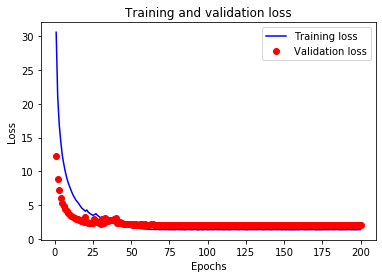

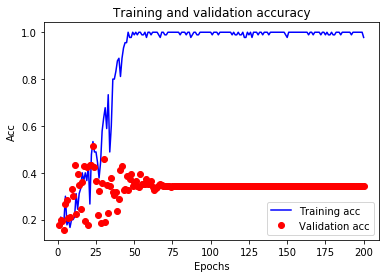

In [608]:
plot_results(history)

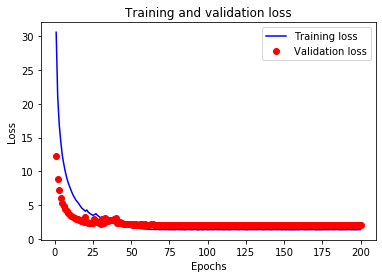

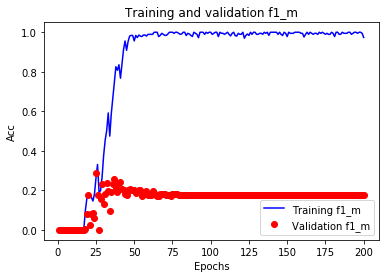

In [609]:
plot_results_f1(history)

In [610]:
from sklearn.metrics import classification_report

y_prob = nn_model.predict(test_seq)
y_pred = y_prob.argmax(axis=-1)



print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.08      0.14        89
           1       0.21      0.72      0.32        97
           2       0.60      0.79      0.68        96
           3       0.40      0.20      0.26        97
           4       0.50      0.01      0.02        97
           5       0.43      0.23      0.30        94

    accuracy                           0.34       570
   macro avg       0.50      0.34      0.29       570
weighted avg       0.50      0.34      0.29       570



In [528]:
del nn_model
%reset_selective -f nn_model

NameError: ignored

In [0]:
import tensorflow.keras.backend as K
K.clear_session()

In [0]:
def cosine_loss(y_true, y_pred):
  cos = CosineSimilarity(axis=-1) 
  return  1 - cos(y_true, y_pred)

In [0]:
!ls

 1800-vocab.pkl   cc.de.300.bin      fastText
 1800-w.npy	 'Colab Notebooks'   full_taggeddataset.csv


In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras.losses import CosineSimilarity, CategoricalCrossentropy
import tensorflow as tf


def build_lstm_model(N_CLASSES,
                    MAX_LEN,
                    NUM_WORDS,
                    EMBEDDING_MATRIX):

  inp = Input(shape=(MAX_LEN,))
  

  emb = Embedding(input_dim=NUM_WORDS,
                  output_dim=EMBEDDING_MATRIX.shape[1],
                  input_length=MAX_LEN,
                  weights=[EMBEDDING_MATRIX],
                  trainable=False)(inp)
  flatten = Flatten()(emb)
  dense1 = Dense(16, activation='relu', activity_regularizer='l1')(flatten)
  dropout = Dropout(0.5)(dense1)
  output = Dense(N_CLASSES, activation='softmax')(dropout)

  model = Model(inputs=inp, outputs=output)

  sgd =  SGD(lr = 0.1, decay = 1e-2, momentum = 0.9, nesterov = False)
  model.compile(loss=cosine_loss,
                optimizer=sgd,
                metrics=[f1_m])

  model.summary()

  return model

In [0]:
nn_model = build_lstm_model(N_CLASSES=np.unique(len(le.classes_)),
                        MAX_LEN=MAX_LEN,
                        NUM_WORDS=len(word_index)+1,
                        EMBEDDING_MATRIX=embedding_matrix)

Model: "model_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_78 (InputLayer)        [(None, 500)]             0         
_________________________________________________________________
embedding_77 (Embedding)     (None, 500, 300)          22888200  
_________________________________________________________________
flatten_60 (Flatten)         (None, 150000)            0         
_________________________________________________________________
dense_90 (Dense)             (None, 16)                2400016   
_________________________________________________________________
dropout_52 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_91 (Dense)             (None, 6)                 102       
Total params: 25,288,318
Trainable params: 2,400,118
Non-trainable params: 22,888,200
______________________________________

In [0]:
history = nn_model.fit(train_seq,
                    y_train,
                    batch_size=51,
                    #validation_split=.5,
                    validation_data=(test_seq,y_test),
                    epochs=500)

In [0]:
from tensorflow.keras.backend import clear_session

In [0]:
clear_session()

# Final Model

In [0]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from tensorflow.keras.losses import CosineSimilarity, CategoricalCrossentropy
import tensorflow as tf


def build_final_model(N_CLASSES,
                    MAX_LEN,
                    NUM_WORDS,
                    EMBEDDING_MATRIX,
                    filter_sizes=[5,3,2],
                    num_filters=32):

  inp = Input(shape=(MAX_LEN,))
  

  emb = Embedding(input_dim=NUM_WORDS,
                  output_dim=EMBEDDING_MATRIX.shape[1],
                  input_length=MAX_LEN,
                  weights=[EMBEDDING_MATRIX],
                  trainable=False)(inp)
  
  emb_dropout = SpatialDropout1D(0.0)(emb)
  
  convolutions = []
  for fs in filter_sizes:

    conv1 = Conv1D(filters=num_filters,
                  strides=2,
                  kernel_size=fs,
                  padding='same',
                  kernel_regularizer='l2',
                  activity_regularizer='l2')(emb_dropout)
    
    conv_dropout1 = SpatialDropout1D(0.5)(conv1)
    pooling1 = MaxPool1D(strides=2, padding='same')(conv_dropout1)
    
    conv2 = Conv1D(filters=num_filters//2,
                      strides=2,
                      kernel_size=fs,
                      padding='same',
                      kernel_regularizer='l2',
                      activity_regularizer='l2')(pooling1)
    conv_dropout2 = SpatialDropout1D(0.5)(conv2)
    pooling2 = MaxPool1D(strides=2, padding='same')(conv_dropout2)


    convolutions.append(pooling2)
  
  if len(convolutions) > 1:
    
    concat = Concatenate()(convolutions)
    lstm = Bidirectional(LSTM(128, recurrent_dropout=0.0))(concat)
    flatten = Flatten()(lstm)
  else:
    lstm = LSTM(128, recurrent_dropout=0.5)(pooling)
    flatten = Flatten()(lstm)
  
  
  dropout1 = Dropout(0.5)(flatten)



  output = Dense(N_CLASSES, activation='softmax')(dropout1)

  model = Model(inputs=inp, outputs=output)

  sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['acc', f1_m])

  model.summary()

  return model

In [199]:
nn_model = build_final_model(N_CLASSES=np.unique(len(le.classes_)),
                        MAX_LEN=MAX_LEN,
                        NUM_WORDS=len(word_index)+1,
                        EMBEDDING_MATRIX=embedding_matrix,
                        num_filters=64,
                        filter_sizes=[5,4,3,2])

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_29 (Embedding)        (None, 500, 300)     22888200    input_30[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_160 (SpatialD (None, 500, 300)     0           embedding_29[0][0]               
__________________________________________________________________________________________________
conv1d_130 (Conv1D)             (None, 250, 64)      96064       spatial_dropout1d_160[0][0]      
___________________________________________________________________________________________

In [200]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, verbose=1, mode='auto', min_delta=0.00001, cooldown=0, min_lr=0)

history = nn_model.fit(train_seq,
                    y_train,
                    batch_size=16,
                    #validation_split=.5,
                    validation_data=(test_seq,y_test),
                    callbacks=[reduce_lr],
                    epochs=100)

Train on 90 samples, validate on 570 samples
Epoch 1/100
90/90 [==============================] - 5s 55ms/sample - loss: 14.7803 - acc: 0.1667 - f1_m: 0.0000e+00 - val_loss: 11.5940 - val_acc: 0.1754 - val_f1_m: 0.0000e+00
Epoch 2/100
90/90 [==============================] - 0s 4ms/sample - loss: 11.2452 - acc: 0.1444 - f1_m: 0.0000e+00 - val_loss: 9.6613 - val_acc: 0.2123 - val_f1_m: 0.0000e+00
Epoch 3/100
90/90 [==============================] - 0s 4ms/sample - loss: 9.4193 - acc: 0.2000 - f1_m: 0.0000e+00 - val_loss: 8.4677 - val_acc: 0.2544 - val_f1_m: 0.0000e+00
Epoch 4/100
90/90 [==============================] - 0s 4ms/sample - loss: 8.2354 - acc: 0.2556 - f1_m: 0.0000e+00 - val_loss: 7.5690 - val_acc: 0.2544 - val_f1_m: 0.0000e+00
Epoch 5/100
90/90 [==============================] - 0s 4ms/sample - loss: 7.3244 - acc: 0.2556 - f1_m: 0.0000e+00 - val_loss: 6.8368 - val_acc: 0.2737 - val_f1_m: 0.0000e+00
Epoch 6/100
90/90 [==============================] - 0s 4ms/sample - loss: 6

In [210]:
from sklearn.metrics import classification_report

y_prob = nn_model.predict(test_seq)
y_pred = y_prob.argmax(axis=-1)

#

print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        89
           1       0.33      0.28      0.30        97
           2       0.85      0.86      0.86        96
           3       0.52      0.48      0.50        97
           4       0.57      0.77      0.66        97
           5       0.66      0.51      0.57        94

    accuracy                           0.63       570
   macro avg       0.63      0.63      0.62       570
weighted avg       0.62      0.63      0.62       570



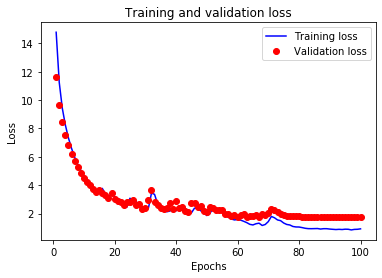

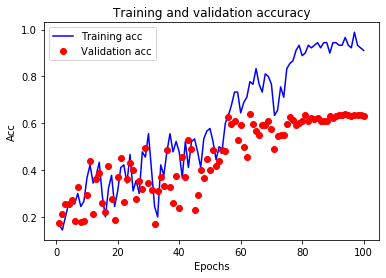

In [211]:
plot_results(history)

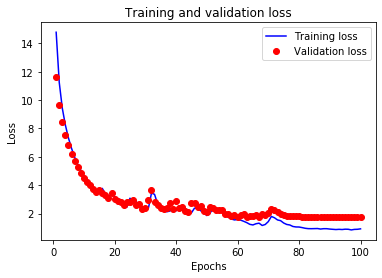

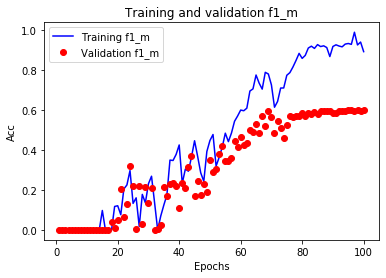

In [212]:
plot_results_f1(history)

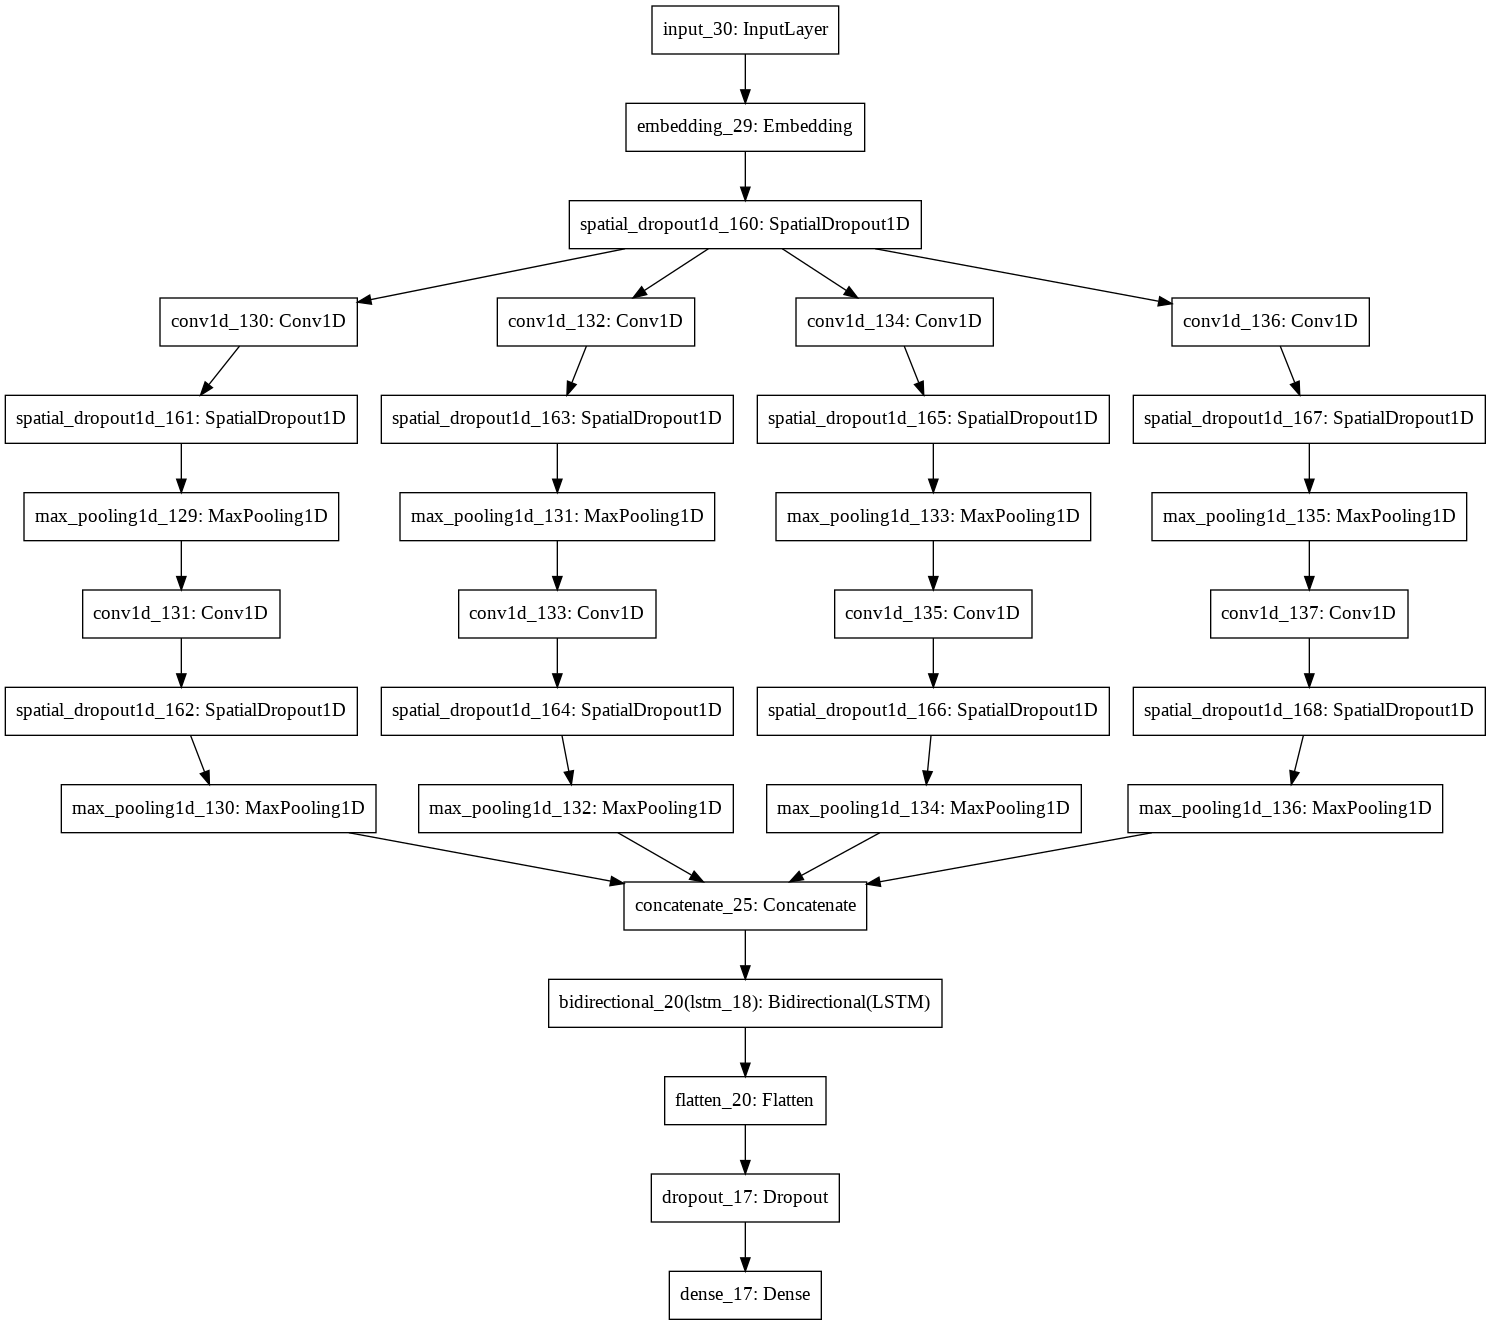

In [213]:
from tensorflow.keras.utils import plot_model

plot_model(nn_model, to_file='model.png')

In [0]:
from sklearn.metrics import classification_report
reports = []
periods = list(sorted(df.period.unique()))

for period_seq, period_label in zip(period_seqs, period_labels):
  prob = nn_model.predict(period_seq)
  pred = prob.argmax(axis=-1)
  reports.append(classification_report(period_label, pred, output_dict=True, target_names=le.classes_))

In [0]:
genre_scores = {}
for genre in df.genre.unique():
  genre_scores[genre] = []
  for report in reports:
    genre_scores[genre].append(report[genre]['f1-score'])

In [216]:
genre_scores

{'DRAM': [1.0,
  0.9375,
  0.7777777777777778,
  0.8,
  0.9444444444444444,
  0.8571428571428572],
 'HUMA': [0.967741935483871,
  0.2962962962962963,
  0.15384615384615383,
  0.13333333333333333,
  0.36363636363636365,
  0.5263157894736842],
 'LEGA': [1.0,
  0.64,
  0.9285714285714286,
  0.851851851851852,
  0.9,
  0.8936170212765957],
 'NARR': [0.9655172413793104,
  0.4864864864864865,
  0.3636363636363636,
  0.4285714285714286,
  0.5263157894736842,
  0.7027027027027027],
 'SCIE': [1.0,
  0.6285714285714286,
  0.6451612903225806,
  0.6071428571428571,
  0.6382978723404256,
  0.7457627118644067],
 'SERM': [1.0,
  0.7499999999999999,
  0.4615384615384615,
  0.33333333333333326,
  0.6341463414634146,
  0.7]}

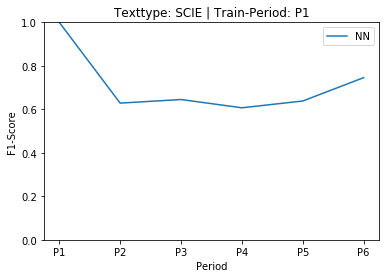

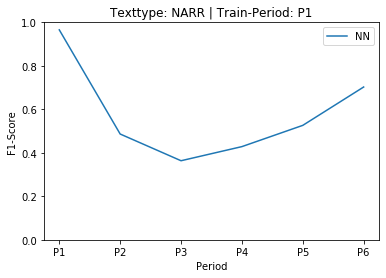

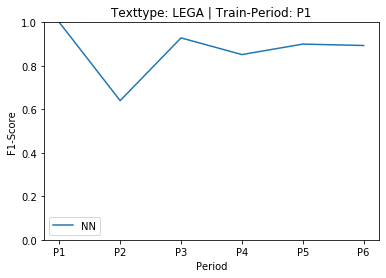

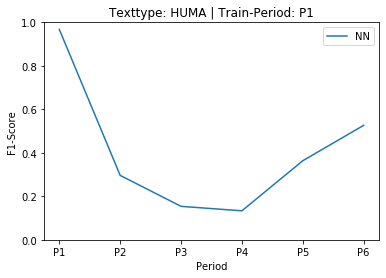

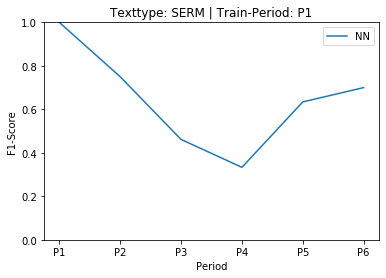

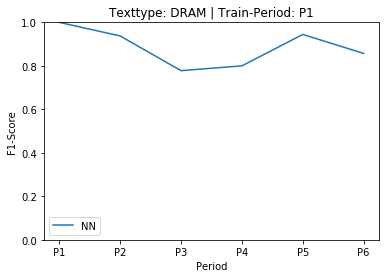

In [217]:
import matplotlib.pyplot as plt

periods = list(sorted(df.period.unique()))

figs, axs = [], []

for genre in genre_scores:

  fig, ax = plt.subplots()

  ax.plot(periods, genre_scores[genre], label='NN')
  ax.legend()
  ax.set_xlabel('Period')
  ax.set_ylabel('F1-Score')
  ax.set_title(f'Texttype: {genre} | Train-Period: P1')
  ax.set_ylim([0,1])

  figs.append(fig)
  axs.append(ax)

In [209]:
df[df.period == 'P1'].groupby('genre').title.count()

genre
DRAM    15
HUMA    15
LEGA    15
NARR    15
SCIE    15
SERM    15
Name: title, dtype: int64

In [0]:
6*15

In [151]:
df[df.period == 'P1'].shape

(90, 11)

In [152]:
df.shape

(660, 11)